In [10]:
# import packages
import pandas as pd # For reading and manipulating 2D data (like spreadsheets)
import numpy as np # For doing numerical calculations (literally NUMerical PYthon)
import matplotlib.pyplot as plt # For making graphs

from sklearn import datasets, linear_model

# Setting to show graphs below cells in colab
%matplotlib inline

In [31]:
temp = pd.read_csv(r"../data/Temp.csv")
temp = temp.loc[temp["Year"] >= 1880]
temp["Temp cum"] = temp["Temp"].cumsum()

sea = pd.read_csv(r"../data/Sea.csv")
sea = sea.loc[sea["Year"] >= 1880]

joint = pd.merge(temp, sea, on='Year', how='inner')
joint = joint.dropna()

joint

,Year,Temp,Temp cum,Sea
0,1880,-0.315832,-0.315832,-180.236283
1,1881,-0.232246,-0.548078,-173.039065
2,1882,-0.295530,-0.843608,-191.580733
3,1883,-0.346474,-1.190082,-190.455727
4,1884,-0.492320,-1.682402,-166.597397
...,...,...,...,...
136,2016,0.932927,-8.625567,56.330711
137,2017,0.845174,-7.780393,55.112391
138,2018,0.762654,-7.017738,52.083272
139,2019,0.891073,-6.126666,60.980739


In [33]:
year_temp = pd.DataFrame({"Year": joint["Year"], "Temp cum": joint["Temp cum"]})

sea_array = joint["Sea"].to_numpy().reshape(-1, 1)

regr = linear_model.LinearRegression(fit_intercept=True)
model_4 = regr.fit(year_temp, sea_array)
print(f"The model [ y = {regr.coef_[0][0]} t + {regr.coef_[0][1]} c + {regr.intercept_[0]}] has score " + 
      f"{regr.score(year_temp, sea_array)}.")


The model [ y = 1.7884458990392442 t + 1.7872142826083228 c + -3540.9578454027433] has score 0.9930519787759735.


/var/folders/kc/xbj2q99s7135d7p12_42vy200000gn/T/ipykernel_93367/2111342728.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Temp cum"] = temp["Temp"].cumsum()


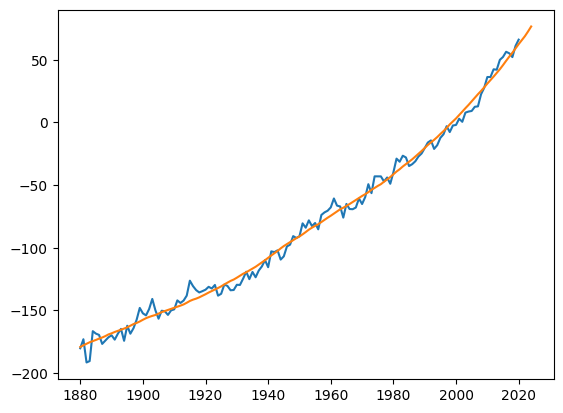

In [34]:
def temp_to_sea(temp):
    temp = temp.loc[temp["Year"] >= 1880]
    temp["Temp cum"] = temp["Temp"].cumsum()
    year_temp = pd.DataFrame({"Year": temp["Year"], "Temp cum": temp["Temp cum"]})

    predict_array = model_4.predict(year_temp)

    sea_predict = pd.DataFrame(
        {
            "Year": [t for t in range(1880, temp["Year"].values[-1]+1)],
            "Sea": [h for h in predict_array],
        }
    )

    return sea_predict

# inspect the fit in historical data
temp = pd.read_csv(r"../data/Temp.csv")
sea_predict = temp_to_sea(temp)
plt.plot(np.asarray(joint["Year"], float), joint["Sea"])
plt.plot(np.asarray(sea_predict["Year"], float), sea_predict["Sea"])
plt.show()